In [329]:
from imdbpie import Imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from BeautifulSoup import BeautifulSoup
import requests
import time
% matplotlib inline

imdb = Imdb()

In [11]:
data=imdb.top_250()
df=pd.DataFrame(data)
del df['image']

In [553]:
df[df['title']=="Ben-Hur"]

,can_rate,num_votes,rating,tconst,title,type,year
192,True,164388,8.1,tt0052618,Ben-Hur,feature,1959


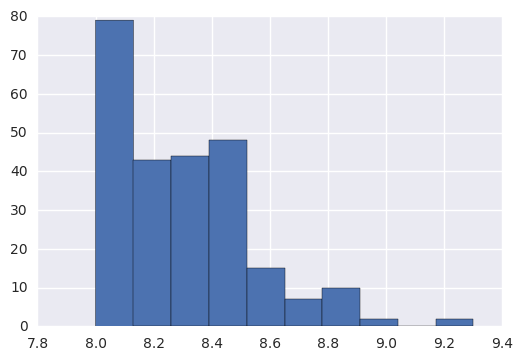

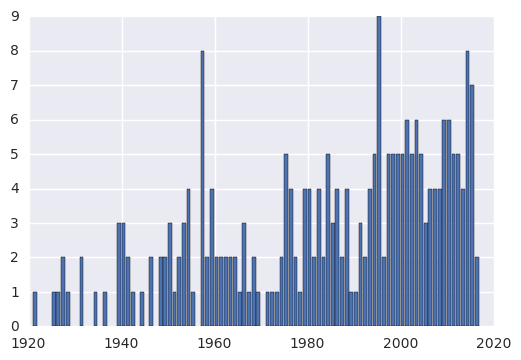

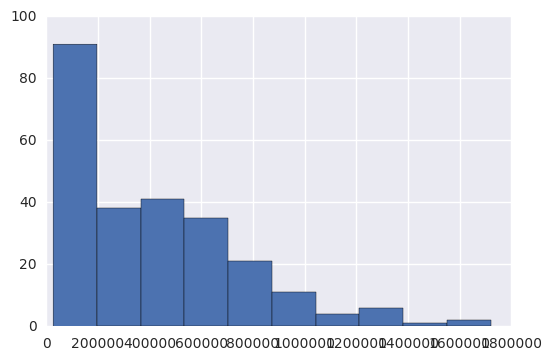

In [528]:
plt.hist(df["rating"])
plt.show()
plt.bar(df.groupby('year')['rating'].count().to_frame().reset_index()['year'],
              df.groupby('year')['rating'].count().to_frame().reset_index()['rating'])
plt.show()
plt.hist(df['num_votes'])
plt.show()

In [38]:
df['year'].astype(int).dtype

dtype('int64')

In [555]:
def get_movie_info(movie_name):
    base_url='https://en.wikipedia.org/wiki/'
    movie_name_url=base_url+movie_name.replace(" ","_")+"_(film)"
    html=requests.get(movie_name_url)
    soup=BeautifulSoup(html.text)
    i=len(soup.findAll('td',{'style':'line-height:1.3em;'}))-1
    information={"URL":movie_name_url}
    for count in range(i):
        information[soup.findAll('th', {'scope':"row"})[count].text]=\
                            soup.findAll('td',{'style':'line-height:1.3em;'})[count].text
    for count in range(i):
        temp=""
        length=len(soup.findAll('td',{'style':'line-height:1.3em;'})[count]('li'))-1
        if length<1:
            temp=soup.findAll('td',{'style':'line-height:1.3em;'})[i].text
        else:
            for x in range(length):
                if x==0:
                    temp+=soup.findAll('td',{'style':'line-height:1.3em;'})[count]('li')[x].text
                else:
                    temp+=", "+soup.findAll('td',{'style':'line-height:1.3em;'})[count]('li')[x].text
            information[soup.findAll('th', {'scope':"row"})[count].text]=temp
    return information
def get_movie_info_with_year(movie_name,year):
    base_url='https://en.wikipedia.org/wiki/'
    movie_name_url=base_url+movie_name.replace(" ","_")+"_("+year+" film)"
    html=requests.get(movie_name_url)
    soup=BeautifulSoup(html.text)
    i=len(soup.findAll('td',{'style':'line-height:1.3em;'}))-1
    information={"URL":movie_name_url}
    for count in range(i):
        information[soup.findAll('th', {'scope':"row"})[count].text]=\
                            soup.findAll('td',{'style':'line-height:1.3em;'})[count].text
    for count in range(i):
        temp=""
        length=len(soup.findAll('td',{'style':'line-height:1.3em;'})[count]('li'))-1
        if length<1:
            temp=soup.findAll('td',{'style':'line-height:1.3em;'})[i].text
        else:
            for x in range(length):
                if x==0:
                    temp+=soup.findAll('td',{'style':'line-height:1.3em;'})[count]('li')[x].text
                else:
                    temp+=", "+soup.findAll('td',{'style':'line-height:1.3em;'})[count]('li')[x].text
            information[soup.findAll('th', {'scope':"row"})[count].text]=temp
    return information

def get_movie_info_no_film(movie_name):
    base_url='https://en.wikipedia.org/wiki/'
    movie_name_url=base_url+movie_name.replace(" ","_")
    html=requests.get(movie_name_url)
    soup=BeautifulSoup(html.text)
    i=len(soup.findAll('td',{'style':'line-height:1.3em;'}))-1
    information={"URL":movie_name_url}
    for count in range(i):
        information[soup.findAll('th', {'scope':"row"})[count].text]=\
                            soup.findAll('td',{'style':'line-height:1.3em;'})[count].text
    for count in range(i):
        temp=""
        length=len(soup.findAll('td',{'style':'line-height:1.3em;'})[count]('li'))-1
        if length<1:
            temp=soup.findAll('td',{'style':'line-height:1.3em;'})[i].text
        else:
            for x in range(length):
                if x==0:
                    temp+=soup.findAll('td',{'style':'line-height:1.3em;'})[count]('li')[x].text
                else:
                    temp+=", "+soup.findAll('td',{'style':'line-height:1.3em;'})[count]('li')[x].text
            information[soup.findAll('th', {'scope':"row"})[count].text]=temp
    return information

In [328]:
get_movie_info('The Good, the Bad and the Ugly')

{'URL': 'https://en.wikipedia.org/wiki/The_Good,_the_Bad_and_the_Ugly_(film)'}

In [331]:
html=requests.get("https://en.wikipedia.org/wiki/The_Good,_the_Bad_and_the_Ugly_(film)")

In [332]:
soup=BeautifulSoup(html.text)

In [352]:
i=len(soup.findAll('th',{'style':"white-space:nowrap;padding-right:0.65em;"}))-1
print soup.findAll('th',{'style':"white-space:nowrap;padding-right:0.65em;"})
print
# for x in range(len(soup.findAll('td',{'style':'line-height:1.3em;'})[i]('li'))-1):
#     print soup.findAll('td',{'style':'line-height:1.3em;'})[i]('li')[x].text
#     print soup.findAll('td',{'style':'line-height:1.3em;'})[i]('td')[x].text
# print soup.findAll('td',{'style':'line-height:1.3em;'})[i].text

[]



In [558]:
movie_dict={}
for number in range(len(df)):
    movie=df.loc[number,'title']
    movie_dict[movie]=get_movie_info(movie)

In [560]:
movie_information=pd.DataFrame(movie_dict).T

In [568]:
movie_information=movie_information.reset_index()
movie_information=movie_information.rename(columns={'index':'title'})
titles=movie_information[pd.isnull(movie_information['Budget'])]['title']

movie_dict2={}
rows=df[df['title'].apply(lambda x: x in titles)]
rows=rows.reset_index()
del rows['title']
for number in range(len(rows)):
    movie=df.loc[number,'title']
    year=df.loc[number,'year']
    movie_dict2[movie]=get_movie_info_with_year(movie,year)
movie_information=pd.concat([movie_information,pd.DataFrame(movie_dict2).T])
movie_information=movie_information.reset_index()
movie_information=movie_information.rename(columns={'index':'title'})
titles=movie_information[pd.isnull(movie_information['Budget'])]['title']

movie_dict3={}
rows=df[df['title'].apply(lambda x: True if x in titles else False)]
rows=rows.reset_index()
del rows['title']
for number in range(len(rows)):
    movie=df.loc[number,'title']
    movie_dict3[movie]=get_movie_info_no_film(movie)
movie_information=pd.concat([movie_information,pd.DataFrame(movie_dict3).T])
movie_information=movie_information.reset_index()
movie_information=movie_information.rename(columns={'index':'title'})

In [574]:
rows=df[df['title']in titles]
rows

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [564]:
rows

<bound method DataFrame.reset_index of Empty DataFrame
Columns: [can_rate, num_votes, rating, tconst, title, type, year]
Index: []>

In [544]:
movie_information=pd.DataFrame(movie_dict).T
movie_information=movie_information.reset_index()
movie_information=movie_information.rename(columns={'index':'title'})
movie_information=movie_information[pd.notnull(movie_information['Budget'])]
#movie_information.head(2)

In [545]:
merged_dfs=pd.merge(df,movie_information,on='title')

In [546]:
#merged_dfs.head(1)

In [547]:
merged_dfs['Budget']=merged_dfs['Budget'].apply(lambda x: x.replace("$",""))
merged_dfs['Running time']=merged_dfs['Running time'].apply(lambda x: x.split(" ")[0])
merged_dfs['Budget']=merged_dfs['Budget'].apply(lambda x: x.replace("[1]","").replace("[2]","").replace("[3]","")\
    .replace("[4]","").replace("[5]","").replace("[6]","").replace("[7]","").replace("[8]","").replace("[9]",""))
merged_dfs['Budget']=merged_dfs['Budget'].apply(lambda x: x.encode('ascii','ignore'))
merged_dfs['Budget']=merged_dfs['Budget'].apply(lambda x: x.replace("million",""))
merged_dfs['Budget']=merged_dfs['Budget'].apply(lambda x: x.replace("&#160;",""))
merged_dfs['Budget']=merged_dfs['Budget'].apply(lambda x: x[:2]if x==4 else x )
merged_dfs['Running time']=merged_dfs['Running time'].apply(lambda x: x.split(" ")[0])
#merged_dfs['Budget']=merged_dfs['Budget'].apply(lambda x: '0.'+x[:3]if "," in x else x)

In [549]:
#merged_dfs[merged_dfs['title']=='Aliens']

In [548]:
merged_dfs['Budget'].unique()

array(['25 ', '67 ', '185 ', '22 ', '88.5 ', '94', '63 ', '93', '55',
       '160 ', '94 ', '3 ', '63', '33 ', '19 ', '6 ', '165 ', '878,000',
       '60 ', '1.5 ', '102 ', '90 ', '9 ', '40 ', '45 ', '911 ', '1.75 ',
       '100 ', '230 ', '1718 ', '32 DM, (12 )', '4,326,000', '2.5 ', '72 ',
       '10 ', '4.5 ', '2.2 ', '1.3 ', '980,000', '15 ', '2 ', '20 ', '18 ',
       '30 ', '5.5 ', '10.512 ', '35 ', '5,100,000Reichsmarks(estimated)',
       '1.4 ', '14.4 ', '28 ', '3.8 ', '11 ', '923,000', '4050 ', '5 ',
       '58 ', '54 ', '6.5 ', '3.85 ', '7 ', '165', '61 ', '17.5 ', '80 ',
       '8 ', '13 ', '4 ', '23 ', '16 ', '150 ', '800,000', '110 ', '1.1 ',
       '2.8 ', '6.4 ', '14.6 ', '29.5 ', '1.2 ', '14 ', '108 ',
       '232.3  (gross)', '1.8 '], dtype=object)

In [534]:
merged_dfs[merged_dfs['Budget']=='32 DM, (12 )']

,can_rate,num_votes,rating,tconst,title,type,year,Based on,Budget,Cantonese,...,Productioncompany,Release dates,Revised Romanization,Running time,Screenplay by,Starring,Story by,Traditional,URL,Written by
33,True,170810,8.4,tt0082096,Das Boot,feature,1981,Das BootbyLothar-Günther Buchheim,"32 DM, (12 )",NaN,...,NaN,"17&#160;September&#160;1981&#160;(1981-09-17),...",NaN,149,Wolfgang Petersen,"Jürgen Prochnow, Herbert Grönemeyer",NaN,NaN,https://en.wikipedia.org/wiki/Das_Boot_(film),NaN


In [530]:
'2 DM, ($12 )'.split()[0]

'2'